# Lista 2


Preparando conjunto de treino e test:

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [2]:
fields_full = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
fields_train = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
fields_test = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

In [83]:
def processDataset(df):
    # Insere os valores faltando em Age
    mean_age = df['Age'].mean()
    std_age = df['Age'].std() # desvio padrão

    min_value = mean_age - std_age
    max_value = mean_age + std_age

    size = df['Age'].isnull().sum()
    df.loc[df['Age'].isnull(), 'Age'] = np.random.randint(min_value, max_value, size=size)
    df['Age'] = df['Age'].astype(int)

    # Insere os valores faltando em Embarked
    embarked_values = ['C', 'Q', 'S']
    size = df['Embarked'].isnull().sum()
    random_values = [embarked_values[i] for i in np.random.randint(0, 3, size=size)]
    df.loc[df['Embarked'].isnull(), 'Embarked'] = random_values
    
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
    
    df['Sex'] = df['Sex'].map({'male': 0, 'famale': 1})

    # Faz o one hot encode em Sex, Embaked, SibSp e Parch, Pclass
    # o  parâmetro'categories' garante que mesmo que o dado esteja faltando será considerado
    sex = df['Sex'].astype(CategoricalDtype(categories=[0, 1]))
    embarked = df['Embarked'].astype(CategoricalDtype(categories=[0, 1, 2]))
    parch = df['Parch'].astype(CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
    sibsp = df['SibSp'].astype(CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8]))
    pclass = df['Pclass'].astype(CategoricalDtype(categories=[1, 2, 3]))
    
    res = pd.concat([df,pd.get_dummies(sex, prefix='Sex')], axis=1)
    res = pd.concat([res,pd.get_dummies(parch, prefix='Parch')], axis=1)
    res = pd.concat([res,pd.get_dummies(sibsp, prefix='SibSp')], axis=1)
    res = pd.concat([res,pd.get_dummies(embarked, prefix='Embarked')], axis=1)
    res = pd.concat([res,pd.get_dummies(pclass, prefix='Pclass')], axis=1)
    
    return res

def clearColumns(df, cols):
    df.drop(cols, inplace=True, axis='columns')
    return df

def addSurvivedCol(df_test, df_full):
    survived = []
    
    names = df_test['Name']
    
    for name in names:
        line = df_full.loc[df_full['Name'] == name]
        print(line.shape)
        print(name)
        survived.append(line['Survived'])
    
    df_test['Survived'] = survived
    
    return df_test

def correlation(df, fields, objective):
    correlation_list = {}
    for col in fields:
        correl = np.corrcoef(df[col], df[objective])
        correlation_list[col] = correl[0][1]

    correlation_list = sorted(correlation_list.items(), key=lambda x:x[1], reverse=True)
    for i in range(len(correlation_list)):
        print(str(correlation_list[i][0]) + ': ' + str(correlation_list[i][1]))

def one_hot_encode(x):
    one_hot = np.zeros([len(x), 2])
    for i in enumerate(x):
        one_hot[(i[0], i[1])] = 1
    return one_hot

In [84]:
df_full = pd.read_csv('dataset.csv', usecols=fields_full)
df_train = pd.read_csv('train.csv', usecols=fields_train)
df_test = pd.read_csv('test.csv', usecols=fields_test)

df_test = addSurvivedCol(df_test, df_full)

df_train = processDataset(df_train)
df_test = processDataset(df_test)

(2, 8)
Kelly, Mr. James
(1, 8)
Wilkes, Mrs. James (Ellen Needs)
(1, 8)
Myles, Mr. Thomas Francis
(1, 8)
Wirz, Mr. Albert
(1, 8)
Hirvonen, Mrs. Alexander (Helga E Lindqvist)
(1, 8)
Svensson, Mr. Johan Cervin
(2, 8)
Connolly, Miss. Kate
(1, 8)
Caldwell, Mr. Albert Francis
(1, 8)
Abrahim, Mrs. Joseph (Sophie Halaut Easu)
(1, 8)
Davies, Mr. John Samuel
(1, 8)
Ilieff, Mr. Ylio
(1, 8)
Jones, Mr. Charles Cresson
(1, 8)
Snyder, Mrs. John Pillsbury (Nelle Stevenson)
(1, 8)
Howard, Mr. Benjamin
(1, 8)
Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)
(1, 8)
del Carlo, Mrs. Sebastiano (Argenia Genovesi)
(1, 8)
Keane, Mr. Daniel
(1, 8)
Assaf, Mr. Gerios
(1, 8)
Ilmakangas, Miss. Ida Livija
(0, 8)
Assaf Khalil, Mrs. Mariana (Miriam")"
(1, 8)
Rothschild, Mr. Martin
(1, 8)
Olsen, Master. Artur Karl
(1, 8)
Flegenheim, Mrs. Alfred (Antoinette)
(1, 8)
Williams, Mr. Richard Norris II
(1, 8)
Ryerson, Mrs. Arthur Larned (Emily Maria Borie)
(1, 8)
Robins, Mr. Alexander A
(1, 8)
Ostby, Miss. Helene Ragn

In [78]:
correlation(df_train, fields_train, 'Survived')

Survived: 1.0
Parch: 0.08162940708348372
Age: -0.05460498031397106
Pclass: -0.33848103596101475
Sex: nan
SibSp: -0.035322498885735645
Embarked: -0.17094251000481697


In [79]:
df_train = clearColumns(df_train, ['Sex', 'Embarked', 'Pclass', 'Parch', 'SibSp'])
df_test = clearColumns(df_test, ['Sex', 'Name', 'Embarked', 'Pclass', 'Parch', 'SibSp'])

In [80]:
# Separa os dados
data_X = df_train.drop(['Survived'], inplace=False, axis='columns').values.tolist()
data_y = df_train['Survived'].values.tolist()

data_X, data_y = shuffle(data_X, data_y, random_state=0)

#data_y = one_hot_encode(data_y)

train_X, val_X = data_X[:800], data_X[800:]
train_y, val_y = data_y[:800], data_y[800:]

test_X = df_test.drop(['Survived'], inplace=False, axis='columns').values.tolist()
test_y = df_test['Survived'].values.tolist()
#test_y = one_hot_encode(test_y)

# Converte tudo pra NpArray
train_X = np.array(train_X)
train_y = np.array(train_y)
train_y = np.reshape(train_y, (len(train_y), 1))

val_X = np.array(val_X)
val_y = np.array(val_y)
val_y = np.reshape(val_y, (len(val_y), 1))

test_X = np.array(test_X)
test_y = np.array(test_y)
test_y = np.reshape(test_y, (len(test_y), 1))

df_test.head(5)
#print(test_y[:2])
# exibe os dados do dataframe
#print(df_train.head(10))

# exibe os dados para treino
#for i in range(2):
    #print(train_X[i])

,Age,Survived,Sex_0,Sex_1,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,...,SibSp_5,SibSp_6,SibSp_7,SibSp_8,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3
0,34,"924 0 925 0 Name: Survived, dtype: int64",1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,47,"1290 1 Name: Survived, dtype: int64",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,62,"511 0 Name: Survived, dtype: int64",1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,27,"1296 0 Name: Survived, dtype: int64",1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,22,"867 1 Name: Survived, dtype: int64",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


### Rede Neural

In [18]:
RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

tf.reset_default_graph()

learning_rate = 0.01
epoch = 1000
interval = 100
batch_size = 10
n_batches = train_X.shape[0]//batch_size

# Layer's sizes
x_size = train_X.shape[1]   # Number of input nodes: 3 features and 1 bias
h_size = 56                 # Number of hidden nodes
y_size = train_y.shape[1]   # Number of outcomes (8 classes)

# Symbols
X = tf.placeholder(tf.float32, shape=[None, x_size], name='X')
y = tf.placeholder(tf.float32, shape=[None, y_size], name='y')

# Weight initializations
w1 = tf.Variable(tf.random_normal(shape=(x_size, h_size)))
b1 = tf.Variable(tf.random_normal(shape=[h_size]))
w2 = tf.Variable(tf.random_normal(shape=(h_size, y_size)))
b2 = tf.Variable(tf.random_normal(shape=[y_size]))

# Operations
hidden_output = tf.nn.sigmoid(tf.add(tf.matmul(X, w1), b1))
dropout = tf.contrib.layers.dropout(hidden_output, keep_prob=0.5)
#final_output = tf.nn.softmax(tf.add(tf.matmul(dropout, w2), b2), name='final_output')
final_output = tf.nn.sigmoid(tf.add(tf.matmul(dropout, w2), b2), name='final_output')

# Cost Function
#loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(final_output), axis=0))
loss = tf.losses.log_loss(y,final_output)

# Optimizer
optimizer = tf.train.AdamOptimizer().minimize(loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Training
print('Training the model...')
losses = {'train':[], 'validation':[]}

for e in range(epoch):
    idxs = np.random.permutation(train_X.shape[0]) #shuffled ordering
    random_X = train_X[idxs]
    random_y = train_y[idxs]
    for i in range(n_batches):
        batch_X = random_X[i * batch_size:(i+1) * batch_size]
        batch_y = random_y[i * batch_size:(i+1) * batch_size]
        sess.run(optimizer,feed_dict = {X: batch_X, y:batch_y})
        
        if i % interval == 0:
            train_loss = sess.run(loss, feed_dict={X: train_X, y: train_y})
            val_loss   = sess.run(loss, feed_dict={X: val_X, y: val_y})
            print('Epoch', e, '|',
                  'Batch', i, '|',
                  'Train Loss:', train_loss , '|',
                  'Validation Loss:', val_loss)
            losses['train'].append(train_loss)
            losses['validation'].append(val_loss)

#save_path = saver.save(sess, './model/my_test_model',global_step=1000)
#print("Model saved in path: %s" % save_path)
#sess.close()

Training the model...
Epoch 0 | Batch 0 | Train Loss: 2.4636676 | Validation Loss: 2.3858838
Epoch 1 | Batch 0 | Train Loss: 1.818768 | Validation Loss: 1.9789746
Epoch 2 | Batch 0 | Train Loss: 1.7734175 | Validation Loss: 1.5937499
Epoch 3 | Batch 0 | Train Loss: 1.7330014 | Validation Loss: 1.8954917
Epoch 4 | Batch 0 | Train Loss: 1.6571187 | Validation Loss: 1.8625473
Epoch 5 | Batch 0 | Train Loss: 1.6399018 | Validation Loss: 1.4961312
Epoch 6 | Batch 0 | Train Loss: 1.6651 | Validation Loss: 1.5368834
Epoch 7 | Batch 0 | Train Loss: 1.4964615 | Validation Loss: 1.8835005
Epoch 8 | Batch 0 | Train Loss: 1.4535373 | Validation Loss: 1.9060489
Epoch 9 | Batch 0 | Train Loss: 1.5114448 | Validation Loss: 1.5881895
Epoch 10 | Batch 0 | Train Loss: 1.2682916 | Validation Loss: 1.376992
Epoch 11 | Batch 0 | Train Loss: 1.2803644 | Validation Loss: 1.2483764
Epoch 12 | Batch 0 | Train Loss: 1.289965 | Validation Loss: 1.0387578
Epoch 13 | Batch 0 | Train Loss: 1.3092216 | Validation Lo

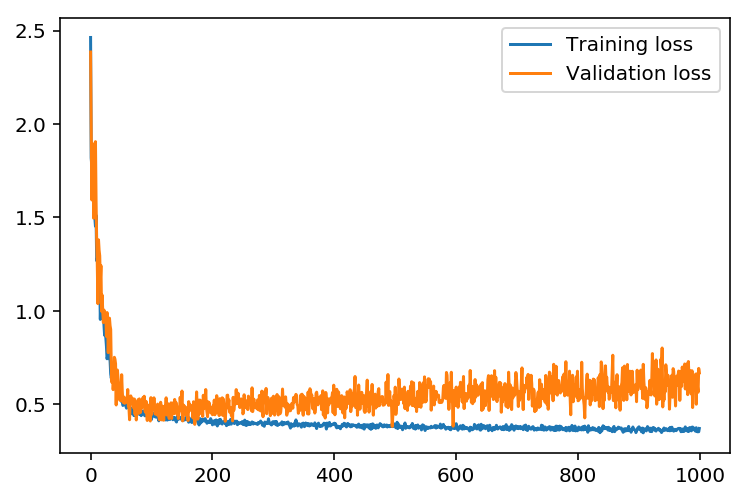

In [19]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

In [23]:
success = 0
results = {'actual':[], 'predicted':[]}
for i in range(len(test_X)):
    predicted = sess.run(final_output, feed_dict={X: [test_X[i]]})
    results['actual'].append(np.argmax(test_y[i]))
    results['predicted'].append(np.argmax(predicted))
    if np.argmax(test_y[i]) == np.argmax(predicted):
        success += 1
    #print('Actual:', test_y[i], 'Predicted:', np.rint(predicted))
    print(test_y[i])

print('Accuracy:', success/len(test_X))

print('Confusion Matrix:')
print(confusion_matrix(results['actual'], results['predicted']))
    

[924    0
925    0
Name: Survived, dtype: int64]
[1290    1
Name: Survived, dtype: int64]
[511    0
Name: Survived, dtype: int64]
[1296    0
Name: Survived, dtype: int64]
[867    1
Name: Survived, dtype: int64]
[1236    1
Name: Survived, dtype: int64]
[725    1
726    0
Name: Survived, dtype: int64]
[360    1
Name: Survived, dtype: int64]
[607    1
Name: Survived, dtype: int64]
[754    0
Name: Survived, dtype: int64]
[876    0
Name: Survived, dtype: int64]
[171    0
Name: Survived, dtype: int64]
[272    1
Name: Survived, dtype: int64]
[455    0
Name: Survived, dtype: int64]
[63    1
Name: Survived, dtype: int64]
[392    1
Name: Survived, dtype: int64]
[470    0
Name: Survived, dtype: int64]
[648    0
Name: Survived, dtype: int64]
[877    0
Name: Survived, dtype: int64]
[Series([], Name: Survived, dtype: int64)]
[246    0
Name: Survived, dtype: int64]
[1082    1
Name: Survived, dtype: int64]
[107    1
Name: Survived, dtype: int64]
[317    1
Name: Survived, dtype: int64]
[253    1
Name: 